In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from torch.utils.data import random_split

In [3]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [5]:
# Load the entire dataset
data_dir = 'data_placeholder2'
full_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=data_transforms['train'])

# Determine sizes for train and validation splits
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Perform the split
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

In [7]:
# Create dataloaders
dataloaders = {
    'train': torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4),
    'val': torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4)
}

# Update dataset sizes
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Print dataset sizes
print(f"Training samples: {dataset_sizes['train']}, Validation samples: {dataset_sizes['val']}")

# Get class names
class_names = full_dataset.classes
print(f"Class names: {class_names}")

Training samples: 4879, Validation samples: 1220
Class names: ['calamansi', 'carrots', 'chili', 'kamatis', 'manga', 'mansanas', 'pineapple', 'saging', 'sibuyas', 'talong']


In [9]:
from torchvision import models

# Load the pre-trained MobileNet_v2 model
model = models.mobilenet_v2(pretrained=True)

# Customize the classifier for your number of classes
num_classes = len(class_names)  # Replace with your actual number of classes
model.classifier[1] = nn.Linear(model.last_channel, num_classes)

# Move the model to the device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

C:\Users\ACER\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
# Training loop
from tqdm import tqdm
import numpy as np

train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []
num_epochs = 20

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 20)
    
    # Metrics initialization
    epoch_train_loss = 0.0
    epoch_train_corrects = 0
    epoch_val_loss = 0.0
    epoch_val_corrects = 0
    
    # Training phase
    model.train()
    train_loader = tqdm(dataloaders['train'], desc="Training", leave=False)
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item() * inputs.size(0)
        epoch_train_corrects += torch.sum(preds == labels.data)

    epoch_train_loss /= dataset_sizes['train']
    epoch_train_acc = epoch_train_corrects.double() / dataset_sizes['train']
    train_loss_history.append(epoch_train_loss)
    train_acc_history.append(epoch_train_acc.item())

    print(f"Train Loss: {epoch_train_loss:.4f} Acc: {epoch_train_acc:.4f}")

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_loader = tqdm(dataloaders['val'], desc="Validating", leave=False)
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            epoch_val_loss += loss.item() * inputs.size(0)
            epoch_val_corrects += torch.sum(preds == labels.data)

    epoch_val_loss /= dataset_sizes['val']
    epoch_val_acc = epoch_val_corrects.double() / dataset_sizes['val']
    val_loss_history.append(epoch_val_loss)
    val_acc_history.append(epoch_val_acc.item())

    print(f"Val Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}")

print("Training complete!")

Epoch 1/20
--------------------


Train Loss: 1.1256 Acc: 0.6395


Val Loss: 0.5167 Acc: 0.8352
Epoch 2/20
--------------------


Train Loss: 0.7947 Acc: 0.7450


Val Loss: 0.4445 Acc: 0.8582
Epoch 3/20
--------------------


Train Loss: 0.6435 Acc: 0.7932


Val Loss: 0.5309 Acc: 0.8426
Epoch 4/20
--------------------


Train Loss: 0.5594 Acc: 0.8237


Val Loss: 0.3282 Acc: 0.9049
Epoch 5/20
--------------------


Train Loss: 0.5385 Acc: 0.8309


Val Loss: 0.3631 Acc: 0.8918
Epoch 6/20
--------------------


Train Loss: 0.4769 Acc: 0.8473


Val Loss: 0.2829 Acc: 0.9213
Epoch 7/20
--------------------


Train Loss: 0.4801 Acc: 0.8510


Val Loss: 0.4201 Acc: 0.8754
Epoch 8/20
--------------------


Train Loss: 0.4369 Acc: 0.8569


Val Loss: 0.2657 Acc: 0.9221
Epoch 9/20
--------------------


Train Loss: 0.4243 Acc: 0.8690


Val Loss: 0.3013 Acc: 0.9016
Epoch 10/20
--------------------


Train Loss: 0.4183 Acc: 0.8723


Val Loss: 0.2920 Acc: 0.9197
Epoch 11/20
--------------------


Train Loss: 0.3758 Acc: 0.8828


Val Loss: 0.2333 Acc: 0.9377
Epoch 12/20
--------------------


Train Loss: 0.3882 Acc: 0.8766


Val Loss: 0.2472 Acc: 0.9393
Epoch 13/20
--------------------


Train Loss: 0.3477 Acc: 0.8897


Val Loss: 0.2286 Acc: 0.9377
Epoch 14/20
--------------------


Train Loss: 0.3289 Acc: 0.8983


Val Loss: 0.2343 Acc: 0.9361
Epoch 15/20
--------------------


Train Loss: 0.3132 Acc: 0.9008


Val Loss: 0.2514 Acc: 0.9238
Epoch 16/20
--------------------


Train Loss: 0.3495 Acc: 0.8903


Val Loss: 0.2767 Acc: 0.9139
Epoch 17/20
--------------------


Train Loss: 0.3070 Acc: 0.9035


Val Loss: 0.2542 Acc: 0.9426
Epoch 18/20
--------------------


Train Loss: 0.3096 Acc: 0.9037


Val Loss: 0.2156 Acc: 0.9336
Epoch 19/20
--------------------


Train Loss: 0.2902 Acc: 0.9096


Val Loss: 0.1482 Acc: 0.9598
Epoch 20/20
--------------------


Train Loss: 0.2881 Acc: 0.9082


Val Loss: 0.1928 Acc: 0.9459
Training complete!


In [13]:
# Save the model
torch.save(model.state_dict(), 'MobilenetV2_withImagedetection_Dataset_90.pth')

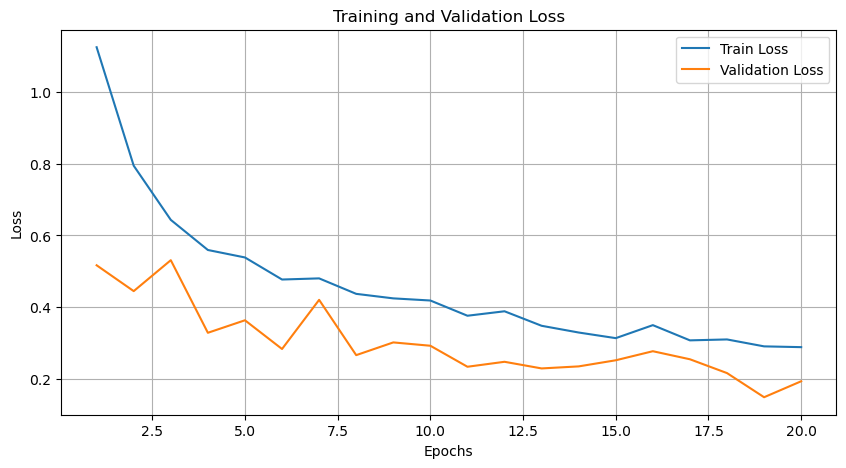

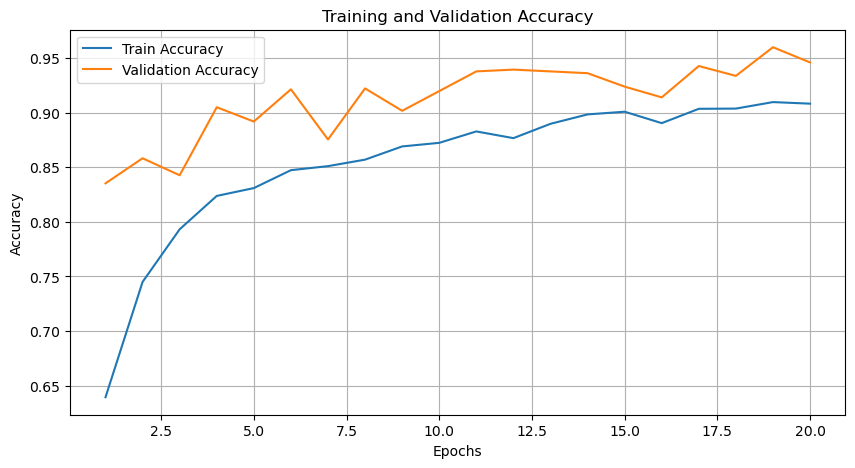

In [15]:
#Plot Training Results
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_acc_history, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

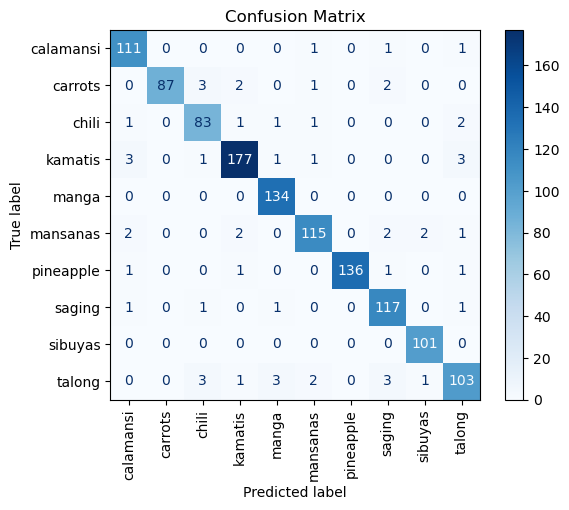

In [17]:
#visualize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Switch the model to evaluation mode
model.eval()

# Collect all true labels and predictions
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in dataloaders['val']:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


Classification Report:
              precision    recall  f1-score   support

   calamansi       0.93      0.97      0.95       114
     carrots       1.00      0.92      0.96        95
       chili       0.91      0.93      0.92        89
     kamatis       0.96      0.95      0.96       186
       manga       0.96      1.00      0.98       134
    mansanas       0.95      0.93      0.94       124
   pineapple       1.00      0.97      0.99       140
      saging       0.93      0.97      0.95       121
     sibuyas       0.97      1.00      0.99       101
      talong       0.92      0.89      0.90       116

    accuracy                           0.95      1220
   macro avg       0.95      0.95      0.95      1220
weighted avg       0.95      0.95      0.95      1220


Per-Class Metrics:
       Class  Precision    Recall  F1-Score
0  calamansi   0.932773  0.973684  0.952790
1    carrots   1.000000  0.915789  0.956044
2      chili   0.912088  0.932584  0.922222
3    kamatis   0.96195

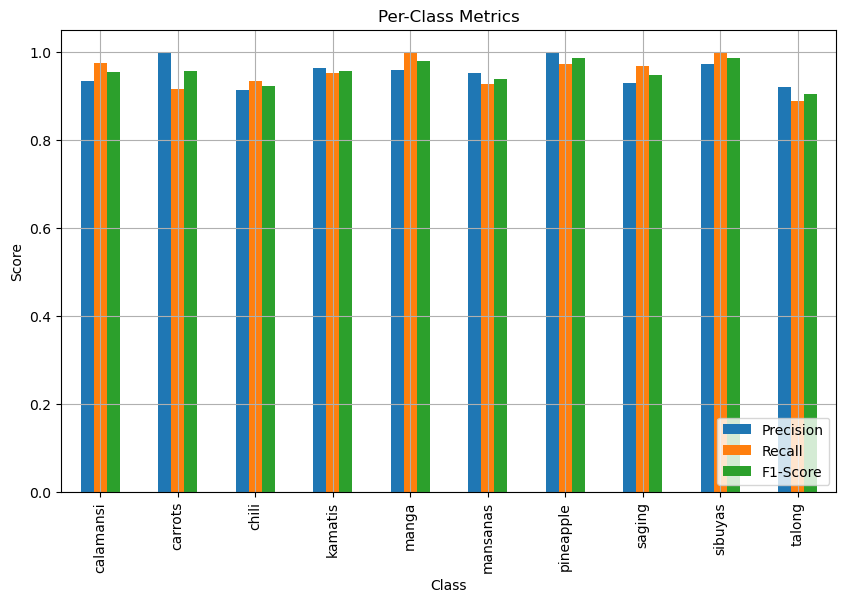

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Compute precision, recall, and F1 score
precision = precision_score(all_labels, all_preds, average=None)
recall = recall_score(all_labels, all_preds, average=None)
f1 = f1_score(all_labels, all_preds, average=None)

# Overall metrics (weighted average)
precision_weighted = precision_score(all_labels, all_preds, average='weighted')
recall_weighted = recall_score(all_labels, all_preds, average='weighted')
f1_weighted = f1_score(all_labels, all_preds, average='weighted')

# Print classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Create a DataFrame for per-class metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})
print("\nPer-Class Metrics:")
print(metrics_df)

# Visualize metrics as a bar chart
metrics_df.plot(x='Class', kind='bar', figsize=(10, 6), title="Per-Class Metrics")
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [48]:
import torch
from torchvision import models, transforms
from torch import nn
from PIL import Image

# Load the saved model with original output size (e.g., 1000 classes)
model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 10)  # Assuming 1000 output units in the saved model
model.load_state_dict(torch.load('MobilenetV2_withImagedetection_Dataset_90.pth'))
model.eval()

# Create a new MobileNet_v2 model with the correct number of classes (e.g., 37 classes for fruits)
new_model = models.mobilenet_v2(pretrained=True)
new_model.classifier[1] = nn.Linear(new_model.classifier[1].in_features, 10)  

# Copy the weights and biases from the loaded model to the new model
new_model.classifier[1].weight.data = model.classifier[1].weight.data[:2]  # Copy only the first 37 output units
new_model.classifier[1].bias.data = model.classifier[1].bias.data[:2]

# Load and preprocess the unseen image
image_path = 'icy_1.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

C:\Users\ACER\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\ACER\AppData\Local\Temp\ipykernel_39624\2422913196.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/S

In [50]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = full_dataset.classes
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')

The predicted class is: kamatis


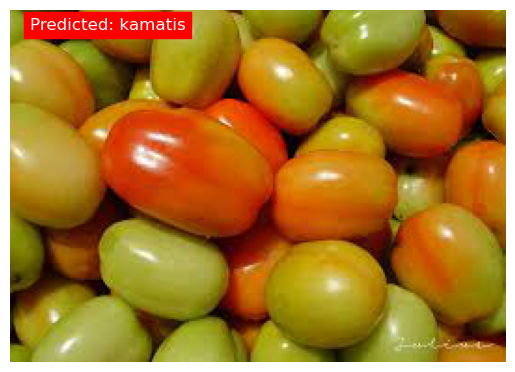

In [52]:
# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

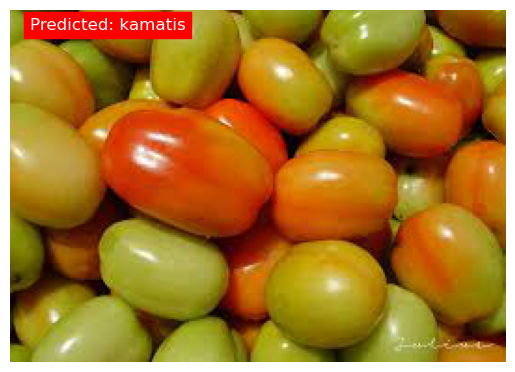

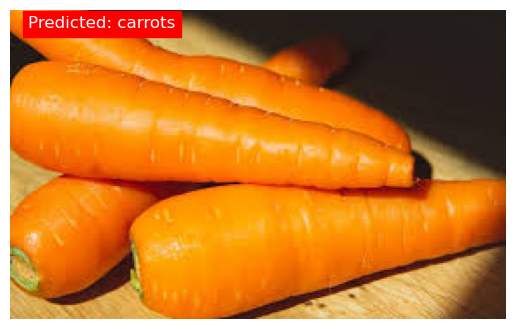

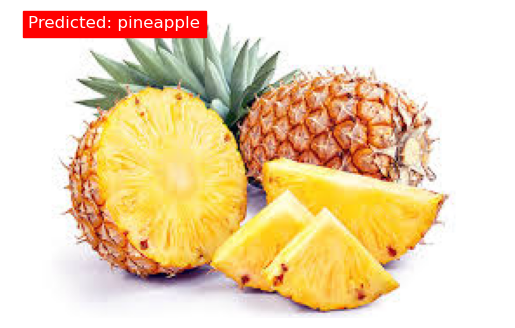

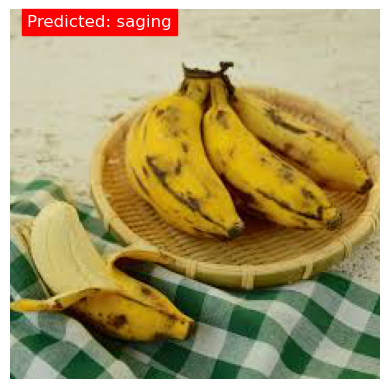

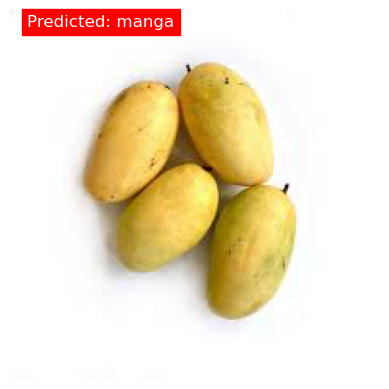

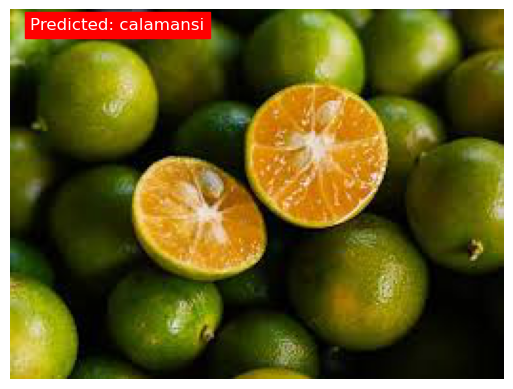

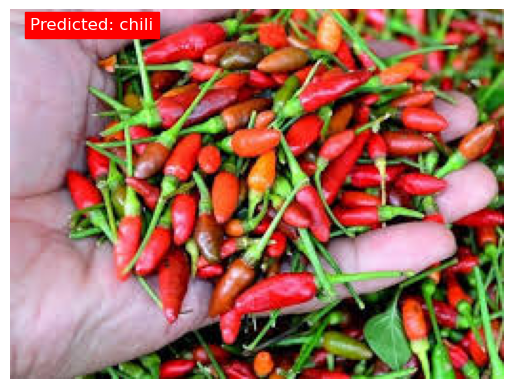

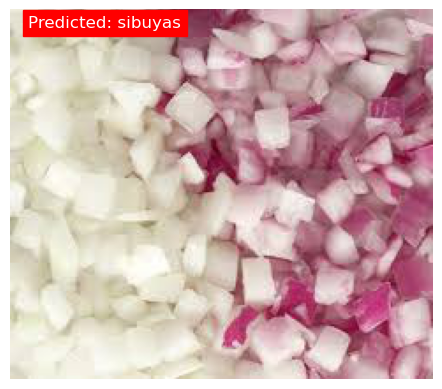

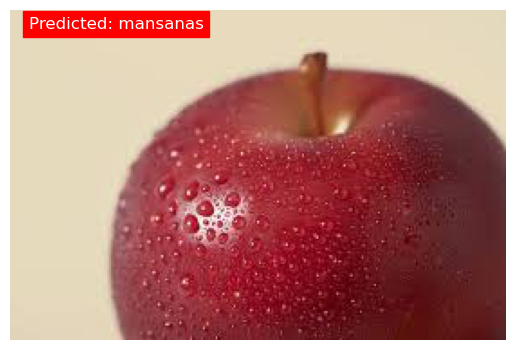

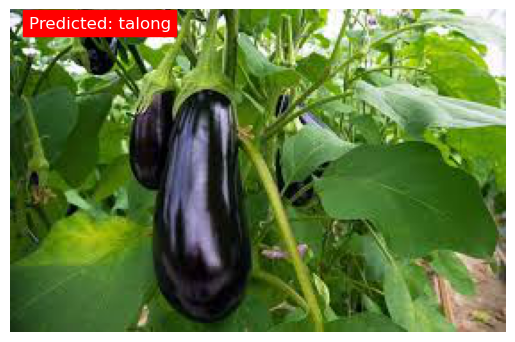

In [56]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define preprocessing steps
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Path to the directory containing images
image_dir = 'test_images'  
batch_images = []
image_names = []

# Load images and preprocess them
for image_name in os.listdir(image_dir):
    if image_name.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(image_dir, image_name)
        image = Image.open(image_path)
        input_tensor = preprocess(image)
        input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension
        batch_images.append(input_batch)
        image_names.append(image_name)

# Concatenate all images into a batch tensor
batch_tensor = torch.cat(batch_images, dim=0)

# Perform inference
with torch.no_grad():
    output = model(batch_tensor)

# Get predicted classes for each image
_, predicted_classes = output.max(1)

# Map predicted classes to class names
class_names = full_dataset.classes
predicted_class_names = [class_names[idx] for idx in predicted_classes]

# Display each image with its predicted class
for i, (image_name, predicted_class_name) in enumerate(zip(image_names, predicted_class_names)):
    # Load image for display (since batch_tensor is preprocessed)
    image_path = os.path.join(image_dir, image_name)
    image = Image.open(image_path)
    image = np.array(image)
    
    # Display image with predicted class
    plt.imshow(image)
    plt.axis('off')
    plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
    plt.show()